In [2]:
# Generate fake graph
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

def generate_heatmap(plot_data, g_args={"cmap": "Greens", "vmin": 0.3, "vmax": 1}, title=None):
    fig, ax = plt.subplots()

    # Create the heatmap with seaborn
    sns.heatmap(
        plot_data, 
        xticklabels=['Natural', 'Prompted', 'Other Model'],
        yticklabels=['Natural', 'Prompted', 'Other Model'],
        annot=True,  # This adds the text annotations
        fmt='.2f',   # Format numbers to 3 decimal places
        cmap=g_args["cmap"],  # You can change the colormap
        vmin=g_args["vmin"],
        vmax=g_args["vmax"],
        ax=ax,
        annot_kws={"size": 14}
    )

    # Rotate x-axis labels
    #plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

    # Set labels and title
    plt.xlabel('Test set', fontsize=12)
    plt.ylabel('Train set', fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=12)

    # increase graph size
    fig.set_size_inches(4, 3)
    # fig.tight_layout()
    plt.show()


In [3]:
# Get ranks of columns
import math

def round_sf(x, sf=2):
    """Round to given significant figures."""
    if x == 0:
        return 0
    return round(x, -int(math.floor(math.log10(abs(x)))) + (sf - 1))

def rank_columns(data, sf=2):
    n_rows = len(data)
    n_cols = len(data[0])
    result = [[0]*n_cols for _ in range(n_rows)]

    for col in range(n_cols):
        # Extract column values with rounding for tie-checking
        col_vals = [data[row][col] for row in range(n_rows)]
        col_rounded = [round_sf(val, sf) for val in col_vals]

        # Sort by value descending
        unique_sorted = sorted(set(col_rounded), reverse=True)

        # Map each rounded value to rank
        val_to_rank = {val: rank+1 for rank, val in enumerate(unique_sorted)}

        # Assign ranks based on rounded values
        for row in range(n_rows):
            result[row][col] = val_to_rank[col_rounded[row]]

    return result


In [4]:
refusal_data = [[0.910, 0.906, 0.915],
                [0.912, 0.924, 0.914],
                [0.910, 0.878, 0.916]]

lists_data = [[0.970, 0.924, 0.969],
              [0.966, 0.932, 0.960],
              [0.968, 0.922, 0.970]]

metaphors_data = [[0.943, 0.986, 0.917],
                  [0.932, 0.991, 0.899],
                  [0.941, 0.982, 0.926]]

science_data = [[0.957, 0.918, 0.948],
                [0.958, 0.934, 0.946],
                [0.957, 0.912, 0.953]]

syco_1_data = [[0.920, 0.887, 0.737],
               [0.917, 0.938, 0.798],
               [0.816, 0.837, 0.891]]

syco_2_data = [[0.922, 0.891, 0.880],
               [0.892, 0.930, 0.865],
               [0.888, 0.892, 0.938]]

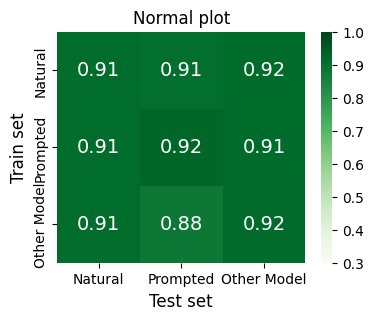

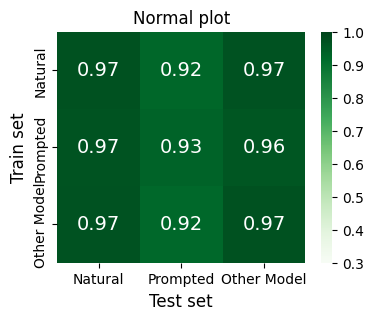

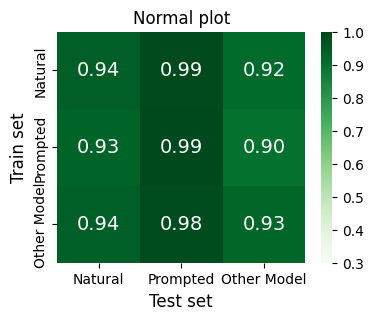

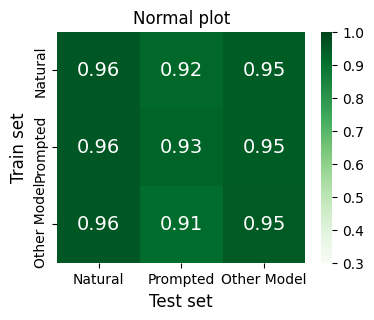

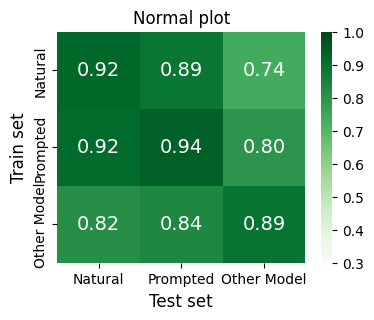

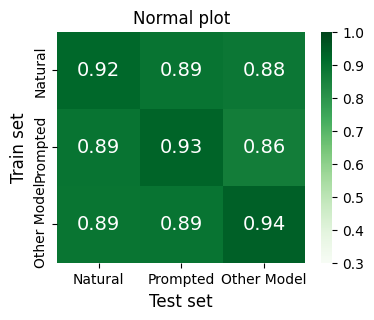

In [ ]:
# Plot normal graphs
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    generate_heatmap(plot_data, title="Normal plot")

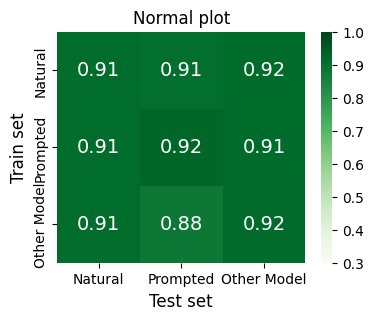

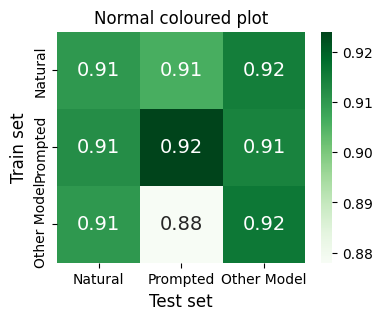

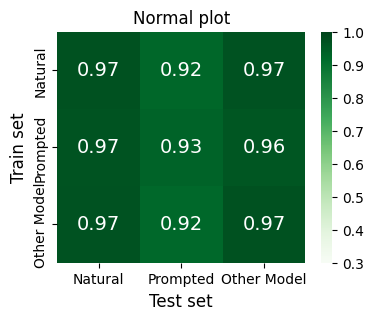

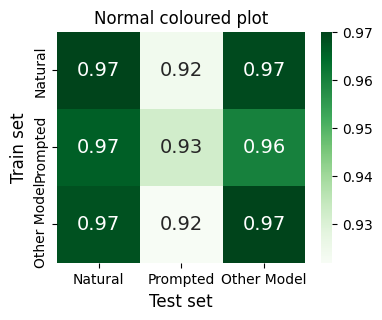

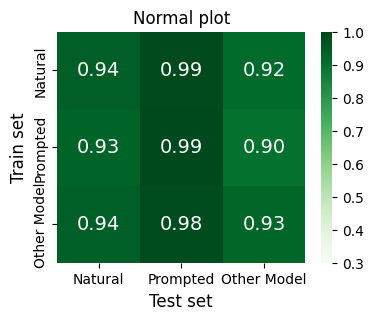

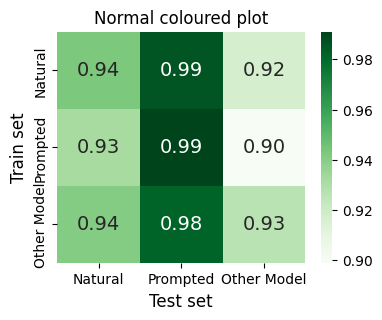

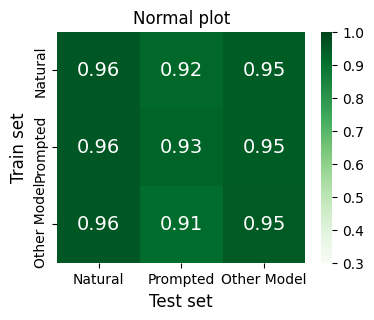

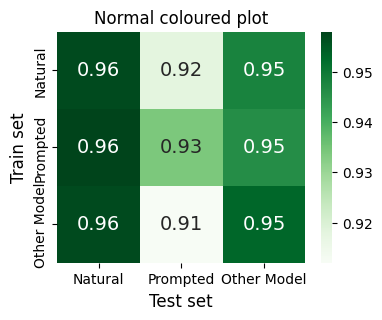

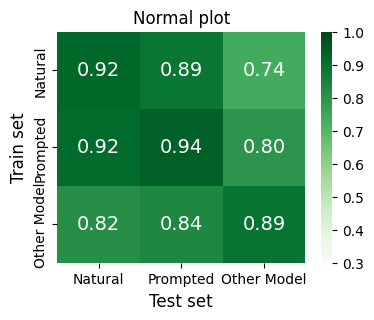

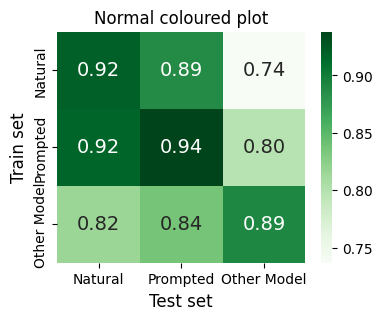

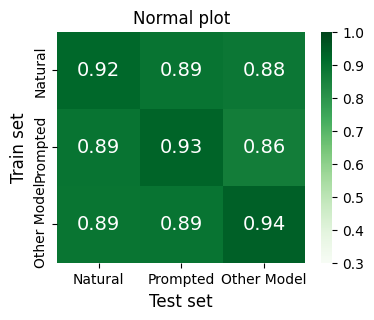

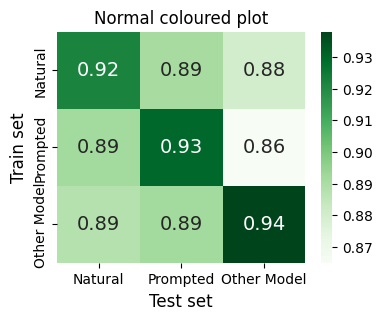

In [ ]:
# Plot graphs with colouring
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    max_val = max([max([c for c in r]) for r in plot_data])
    min_val = min([min([c for c in r]) for r in plot_data])
    generate_heatmap(plot_data, title="Normal plot")
    generate_heatmap(plot_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normal coloured plot")

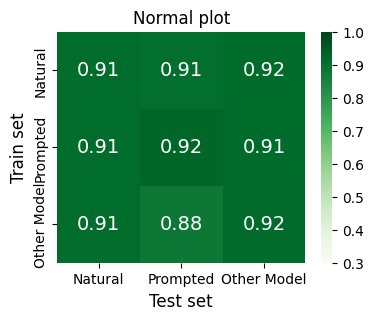

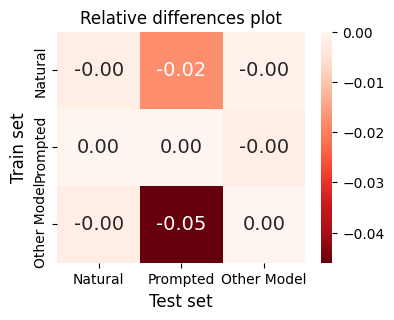

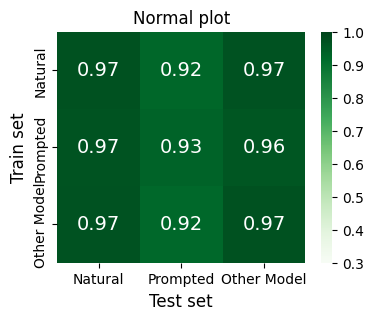

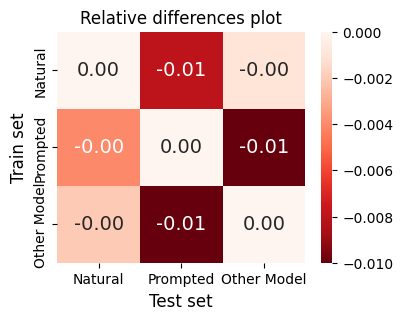

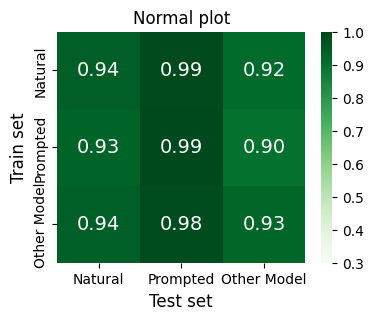

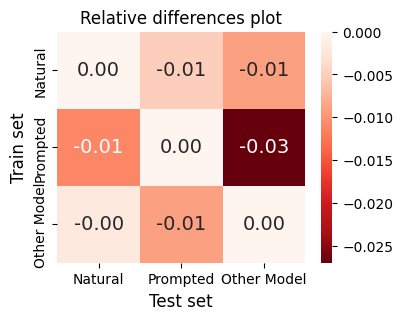

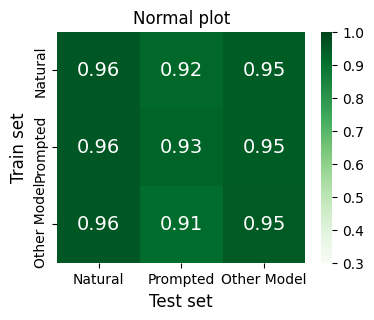

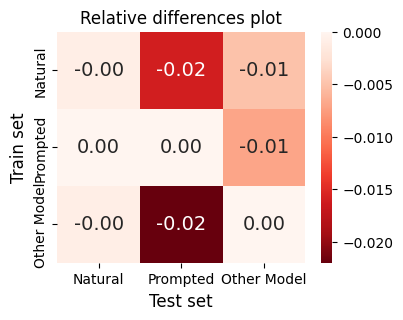

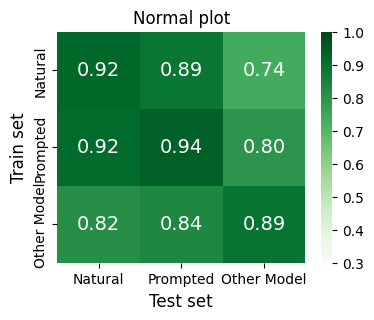

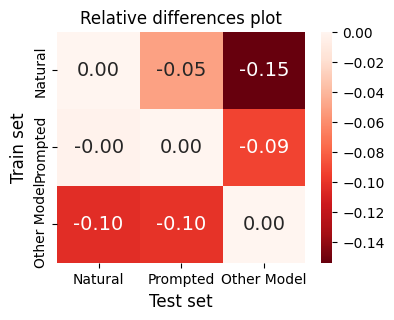

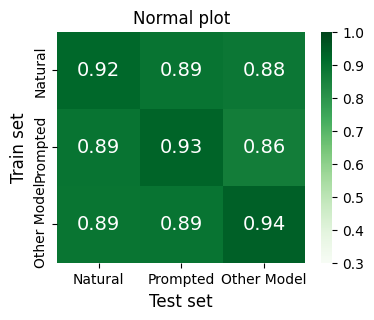

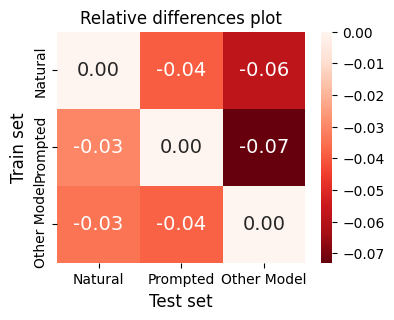

In [7]:
# Plot graphs with relative differences
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = plot_data[row][col] - col_max
    generate_heatmap(plot_data, title="Normal plot")
    generate_heatmap(adjusted_plot_data, g_args={"cmap": "Reds_r", "vmin": None, "vmax": None}, title="Relative differences plot")

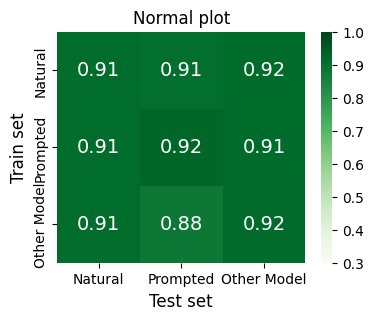

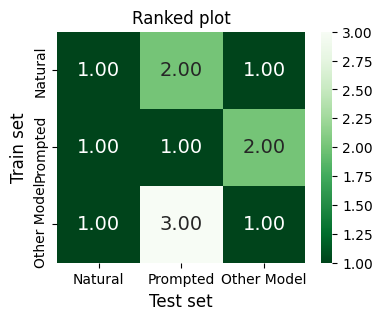

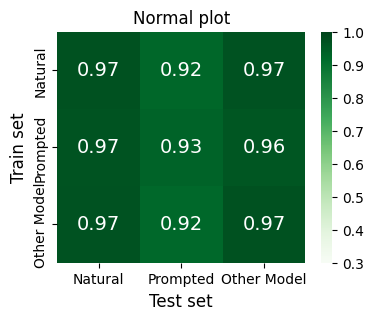

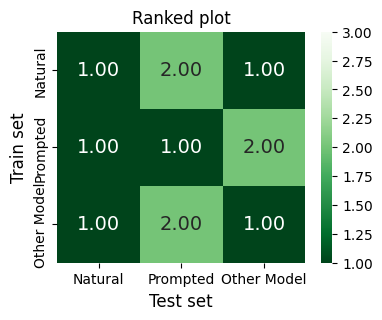

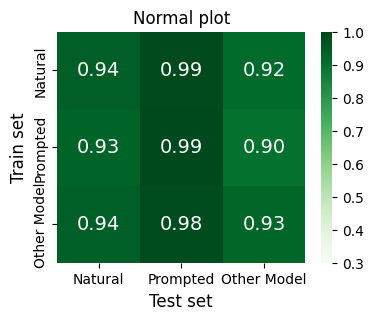

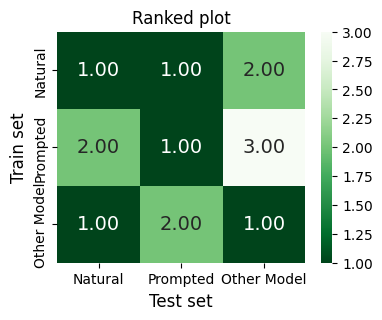

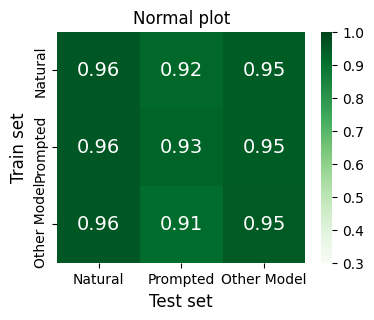

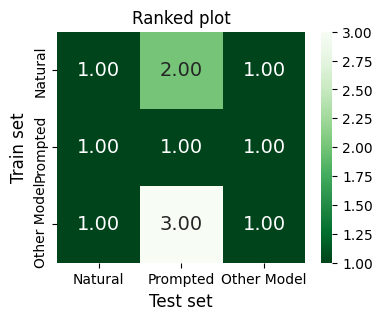

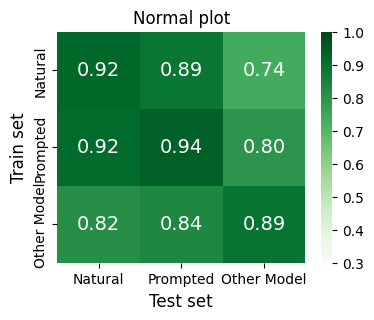

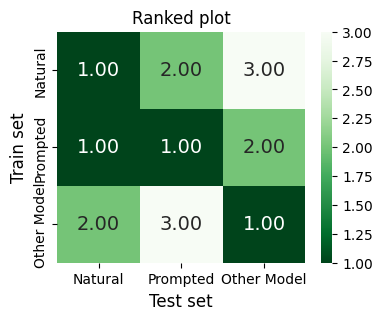

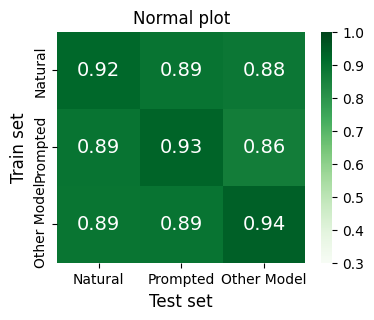

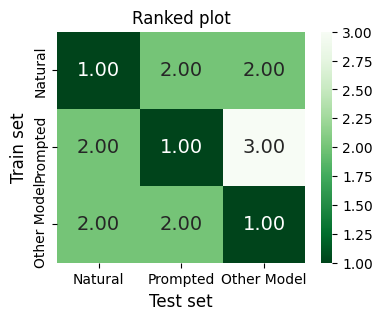

In [15]:
# Plot graph ranks
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    adjusted_plot_data = rank_columns(plot_data, sf=2)
    generate_heatmap(plot_data, title="Normal plot")
    generate_heatmap(adjusted_plot_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Ranked plot")

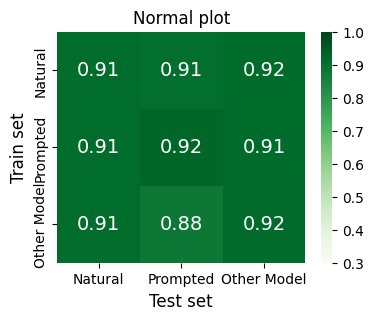

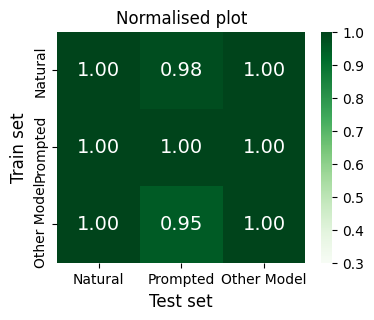

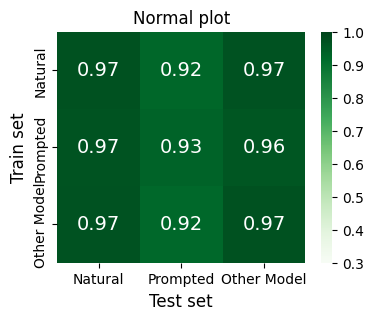

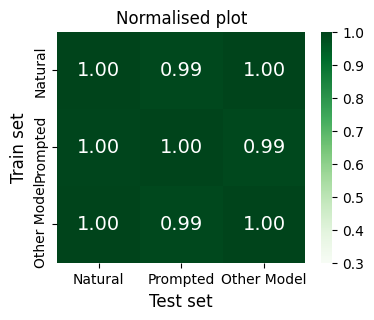

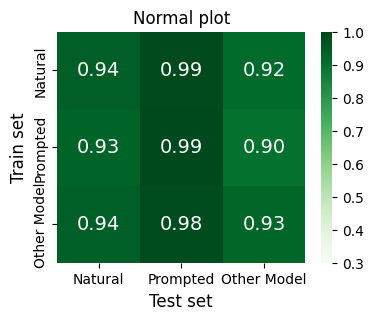

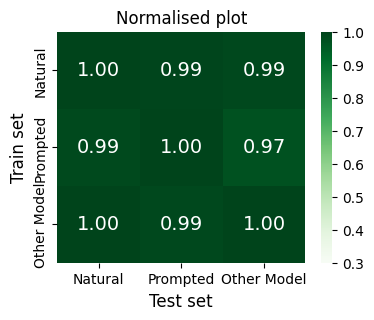

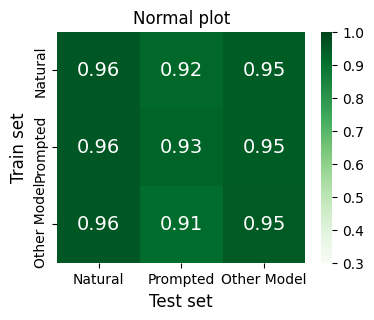

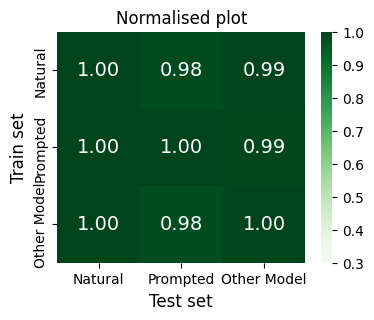

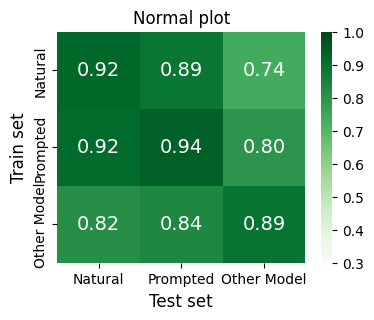

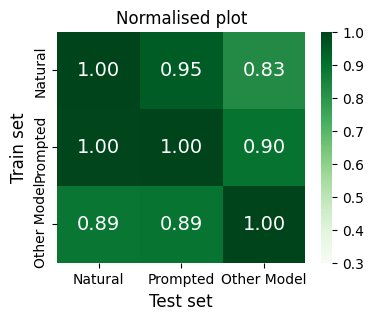

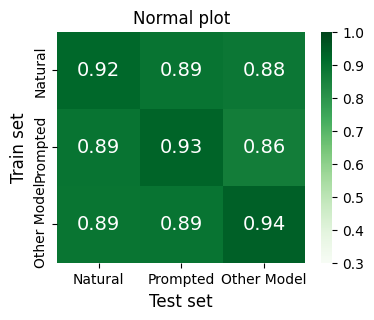

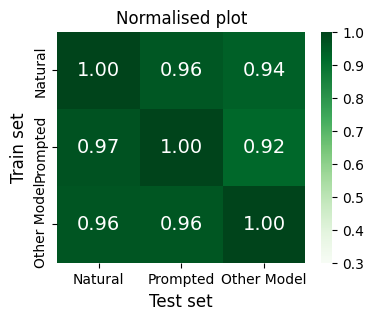

In [8]:
# Plot graphs normalised
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = (plot_data[row][col] / col_max)
    generate_heatmap(plot_data, title="Normal plot")
    generate_heatmap(adjusted_plot_data, title="Normalised plot")

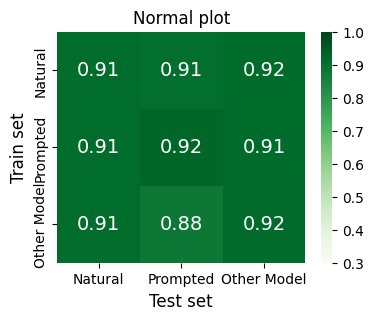

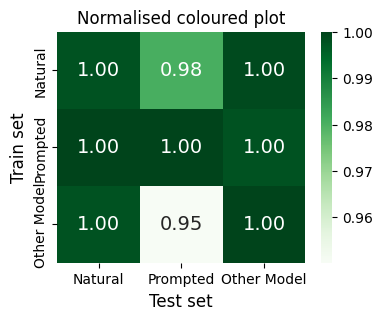

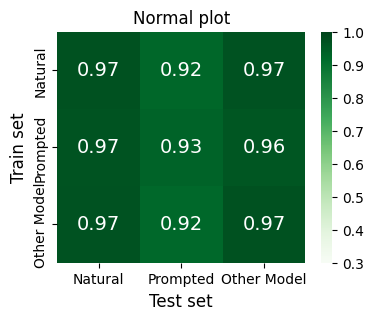

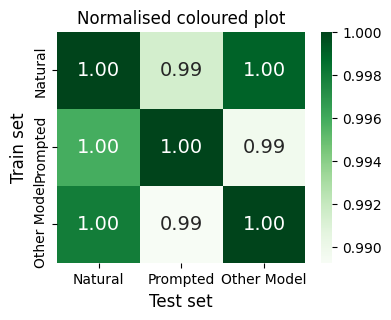

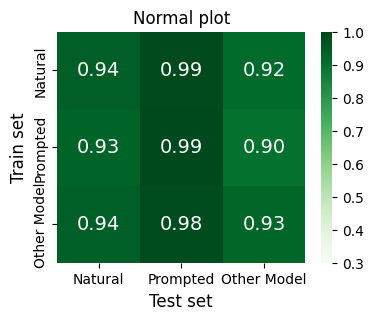

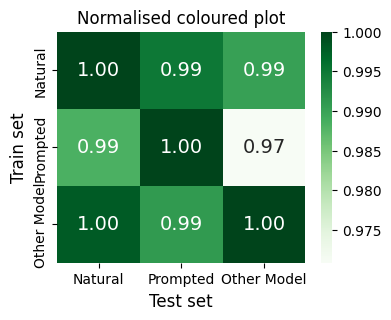

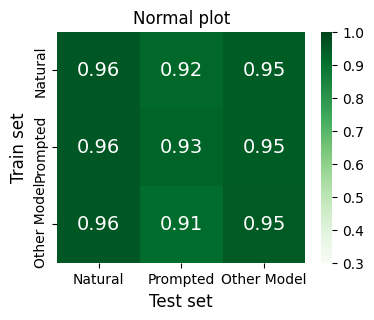

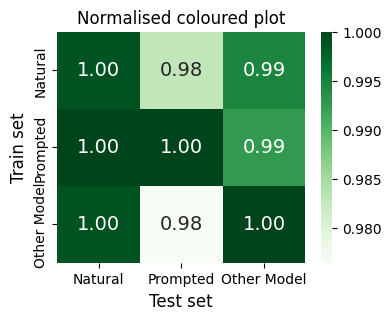

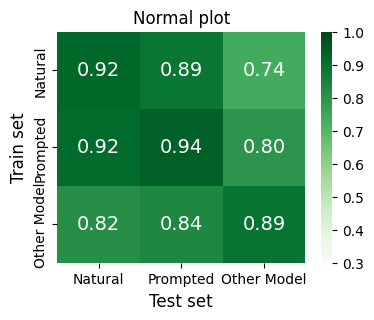

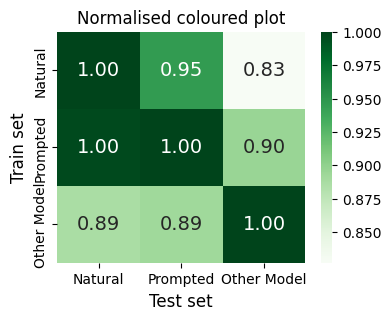

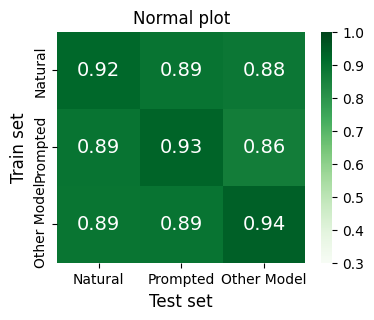

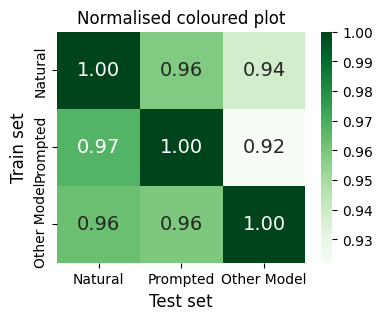

In [14]:
# Plot graphs normalised coloured
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = (plot_data[row][col] / col_max)
    generate_heatmap(plot_data, title="Normal plot")
    max_val = max([max([c for c in r]) for r in adjusted_plot_data])
    min_val = min([min([c for c in r]) for r in adjusted_plot_data])
    generate_heatmap(adjusted_plot_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normalised coloured plot")


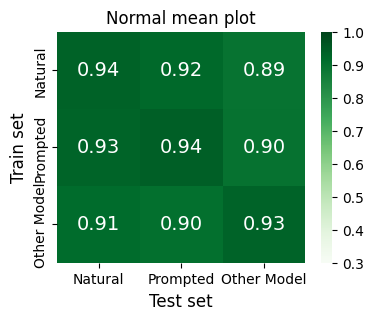

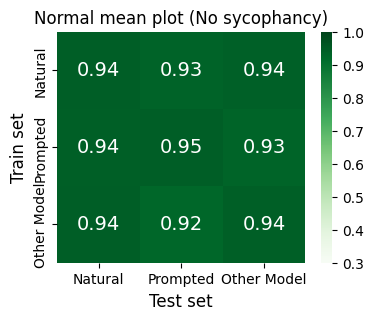

In [10]:
# Plot mean of all graphs
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, title="Normal mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, title="Normal mean plot (No sycophancy)")

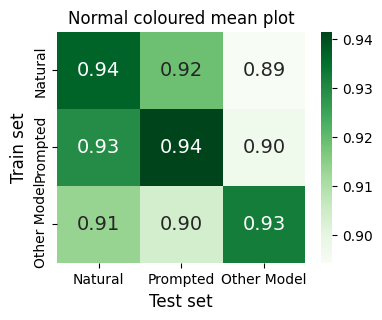

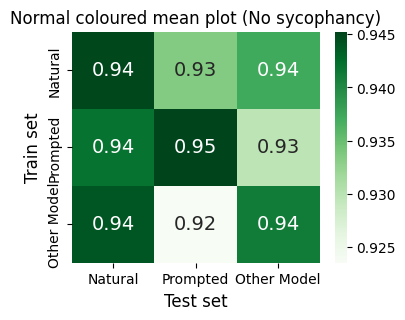

In [23]:
# Plot mean of all coloured graphs
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

max_val = max([max([c for c in r]) for r in mean_data])
min_val = min([min([c for c in r]) for r in mean_data])   
generate_heatmap(mean_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normal coloured mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)
        
max_val = max([max([c for c in r]) for r in mean_data])
min_val = min([min([c for c in r]) for r in mean_data])   
generate_heatmap(mean_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normal coloured mean plot (No sycophancy)")

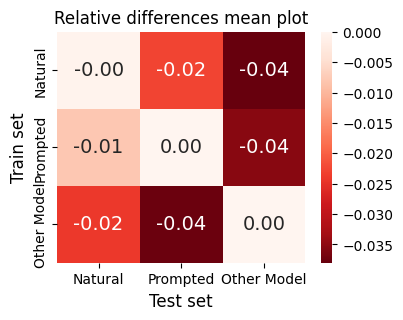

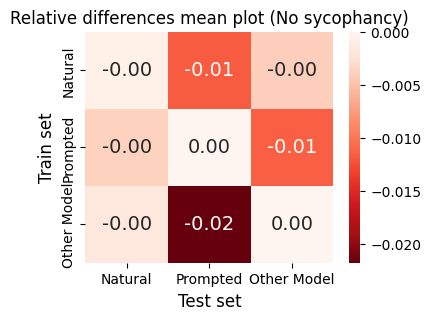

In [11]:
# Plot mean of all graphs with relative differences
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
new_data_list = []
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = plot_data[row][col] - col_max
    new_data_list.append(adjusted_plot_data)

mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in new_data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, g_args={"cmap": "Reds_r", "vmin": None, "vmax": None}, title="Relative differences mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
new_data_list = []
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = plot_data[row][col] - col_max
    new_data_list.append(adjusted_plot_data)

mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in new_data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, g_args={"cmap": "Reds_r", "vmin": None, "vmax": None}, title="Relative differences mean plot (No sycophancy)")

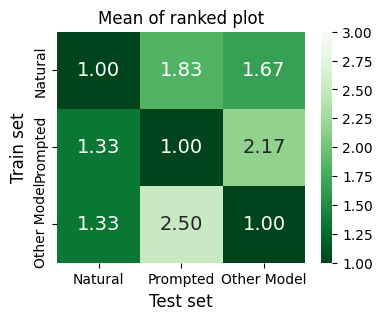

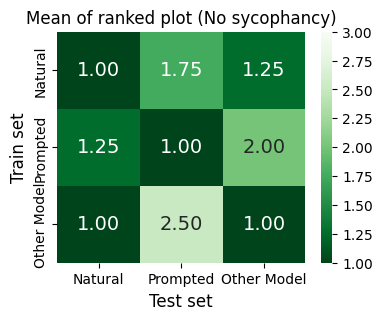

In [25]:
# Plot mean of all graphs with graph ranks
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
new_data_list = []
for plot_data in data_list:
    adjusted_plot_data = rank_columns(plot_data, sf=2)
    new_data_list.append(adjusted_plot_data)

mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in new_data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Mean of ranked plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
new_data_list = []
for plot_data in data_list:
    adjusted_plot_data = rank_columns(plot_data, sf=2)
    new_data_list.append(adjusted_plot_data)

mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in new_data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Mean of ranked plot (No sycophancy)")

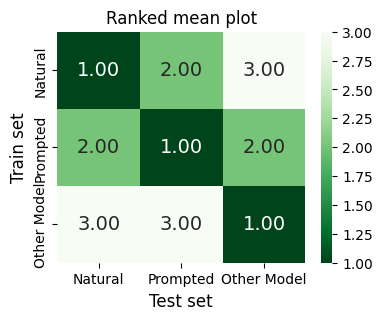

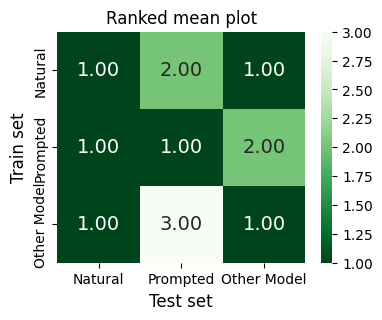

In [26]:
# Plot ranks of mean of all graphs
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

mean_data = rank_columns(mean_data, sf=2)
generate_heatmap(mean_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Ranked mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

mean_data = rank_columns(mean_data, sf=2)
generate_heatmap(mean_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Ranked mean plot")


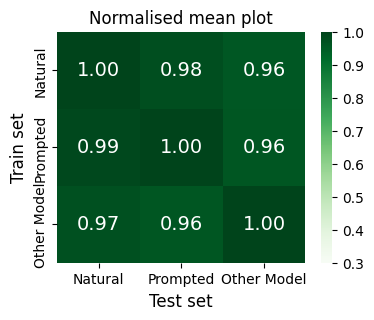

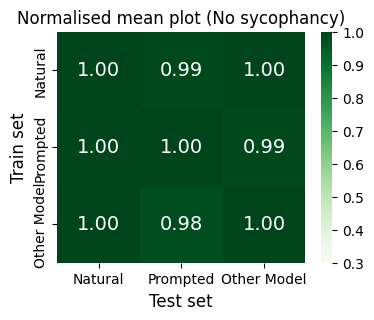

In [10]:
# Plot mean of all graphs normalised
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            mean_data[row][col] += plot_data[row][col] / col_max
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, title="Normalised mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            mean_data[row][col] += plot_data[row][col] / col_max
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, title="Normalised mean plot (No sycophancy)")

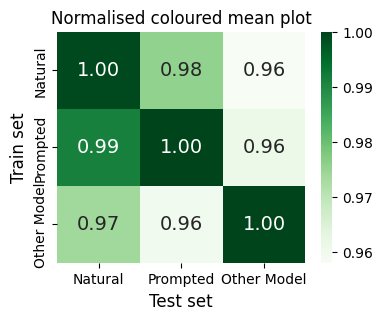

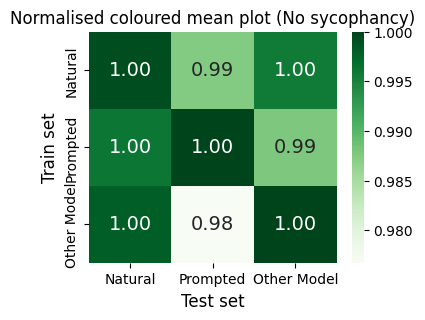

In [13]:
# Plot mean of all graphs normalised coloured
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            mean_data[row][col] += plot_data[row][col] / col_max
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

max_val = max([max([c for c in r]) for r in mean_data])
min_val = min([min([c for c in r]) for r in mean_data])
generate_heatmap(mean_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normalised coloured mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            mean_data[row][col] += plot_data[row][col] / col_max
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

min_val = min([min([c for c in r]) for r in mean_data])
max_val = max([max([c for c in r]) for r in mean_data])
generate_heatmap(mean_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normalised coloured mean plot (No sycophancy)")